In [ ]:
#결정트리, 도수 당도 ph 값으로 와인종류 구분하기

import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
data = wine [['alcohol', 'sugar', 'pH']]
target = wine['class']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()     #데이터 표준화
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))  #점수가 낮음, 과소적합인듯..

print(lr.coef_, lr.intercept_) 
#아마도 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, pH가 높을수록 레드와인일 가능성이 높은 듯

0.7602462959399654
0.7438461538461538
[[ 0.4270427   0.35107217 -4.06298437]] [8.48363274]


c:\Users\user\anaconda3\envs\ai-study\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\envs\ai-study\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42) 
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) #과대적합

0.996921300750433
0.8592307692307692


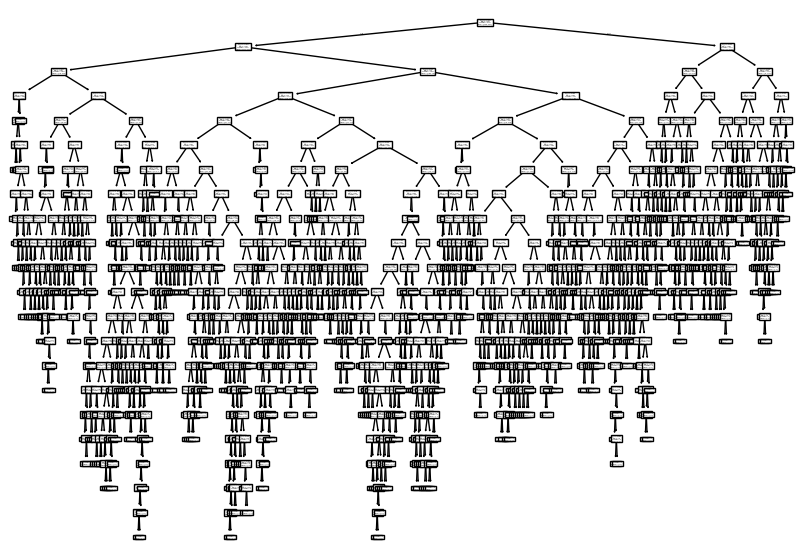

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) 
plot_tree(dt)
plt.show()

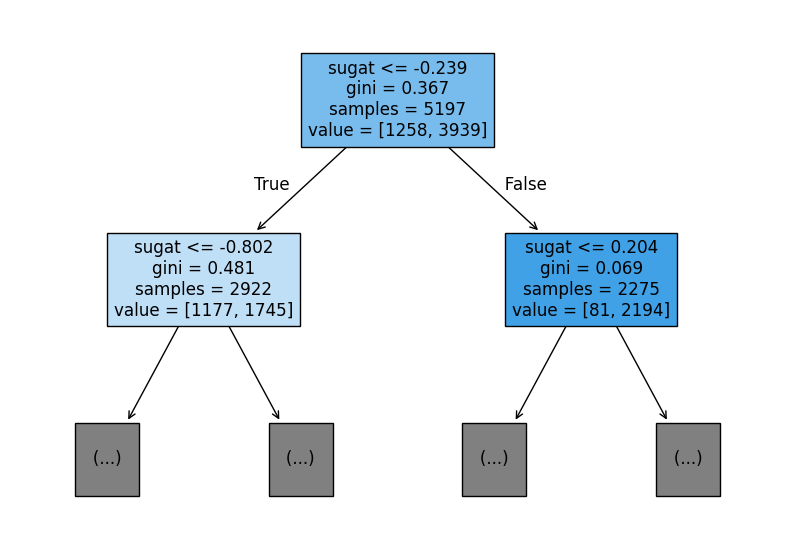

In [12]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled = True,
          feature_names=['alcohol','sugat','ph'])
plt.show()

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


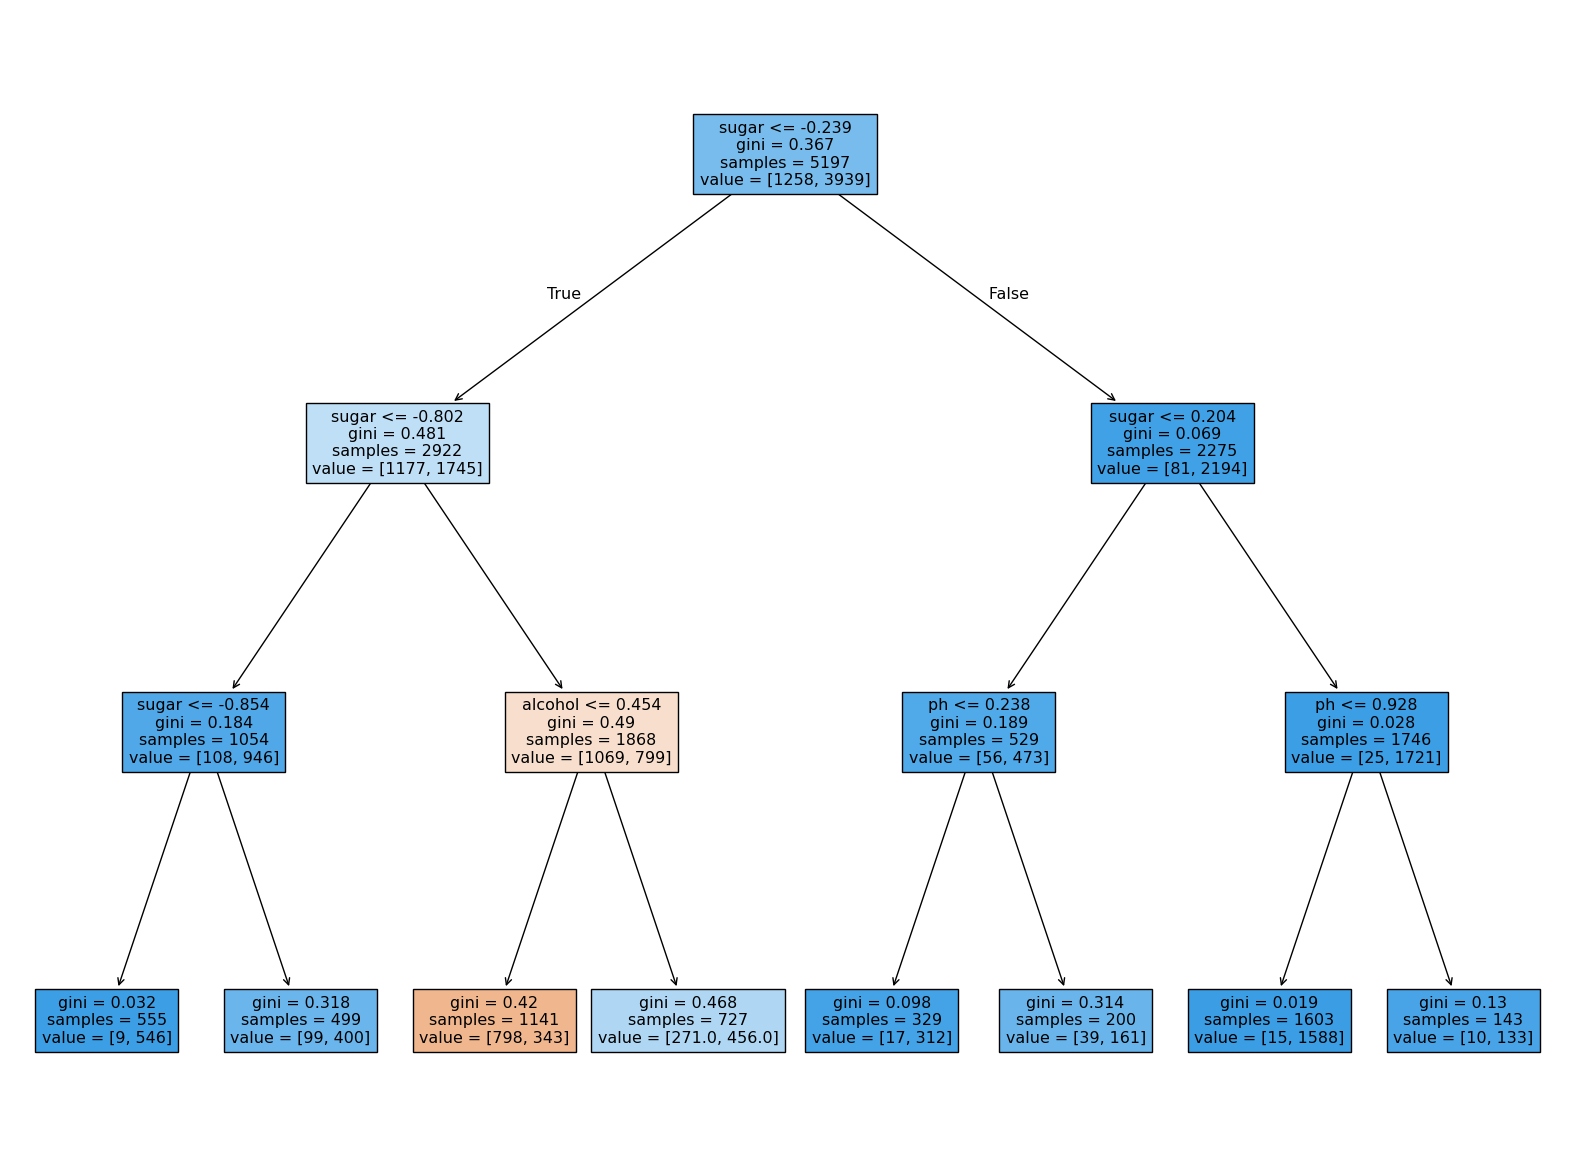

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'ph'])
#모델(객체, 노드 클래스 색깔 채우기, 리스트 형태로 데이터셋 전달)
#조건 설정은 모델이 알아서 
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) #과대적합
plt.show()

0.8454877814123533
0.8415384615384616


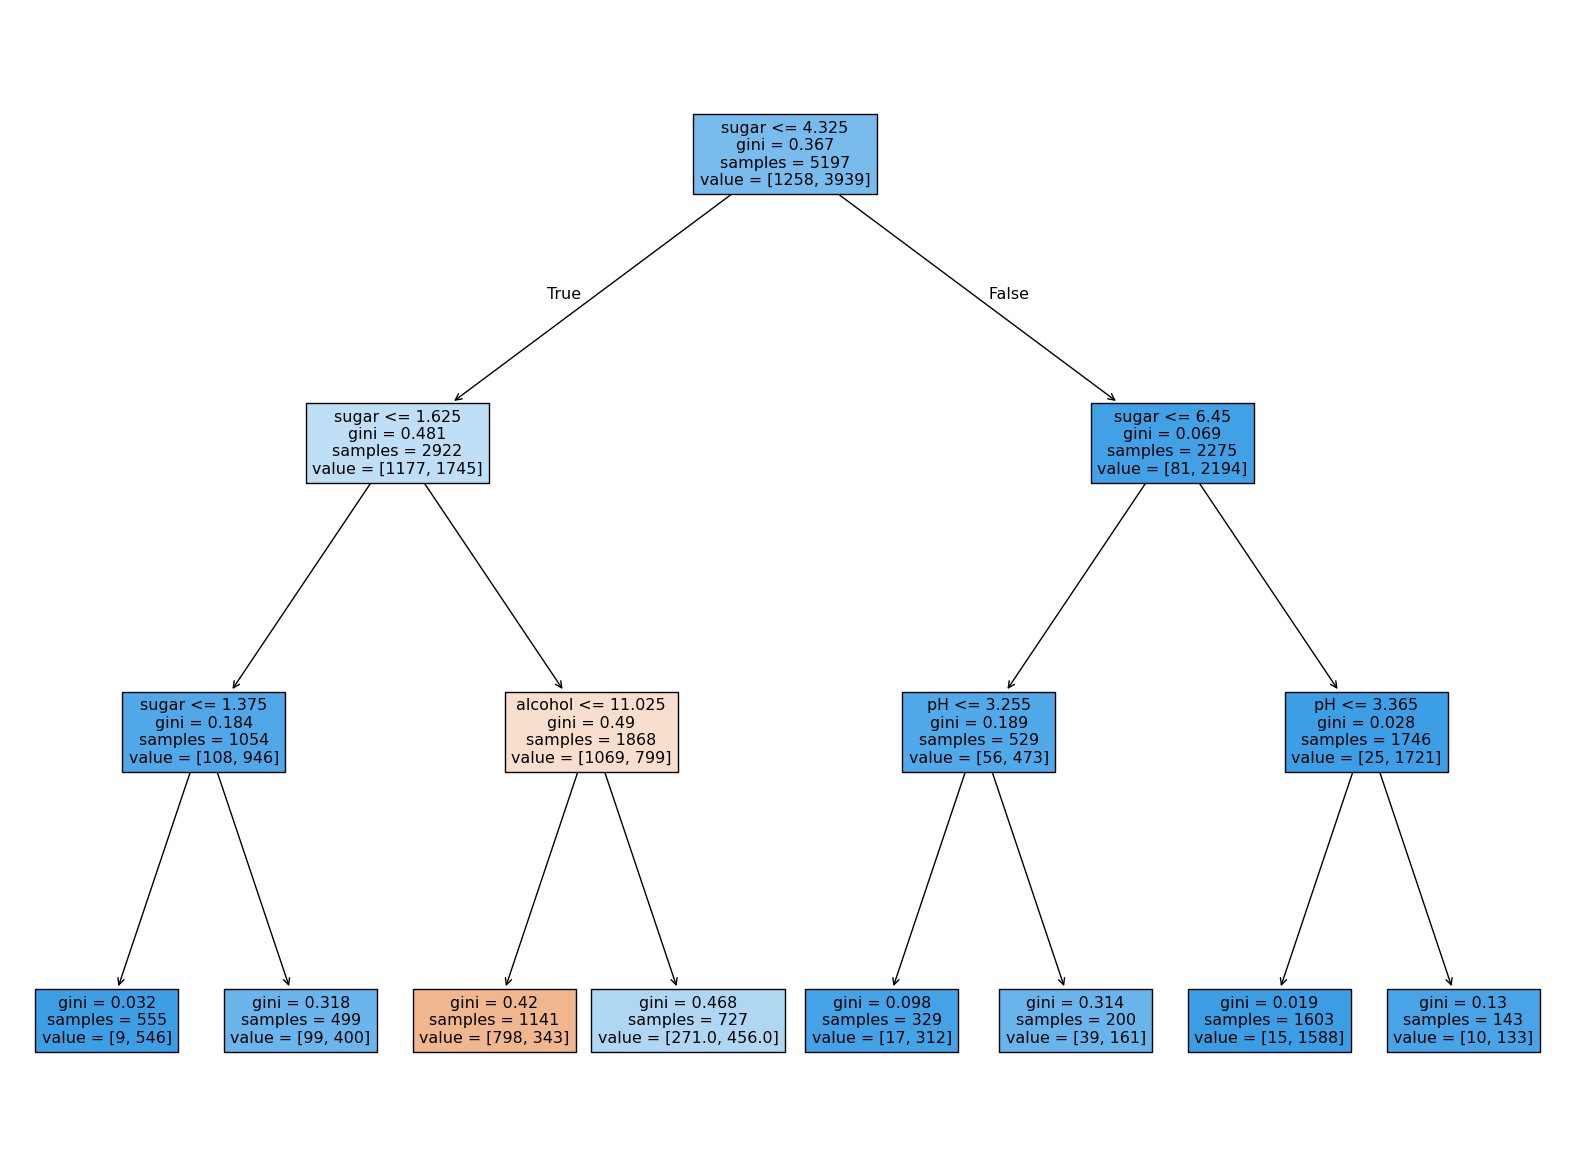

[0.12345626 0.86862934 0.0079144 ]


In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target)) 

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) 
plt.show()

print(dt.feature_importances_)   #계수,, 중요도 확인 가능